# IMPORT DEPENDECIES

In [ ]:
# GENERAL
import os
import time 
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PREPROCESSING
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# PLOT RESULTS
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
print("IMPORT DONE")

IMPORT DONE


# DEFINE FUNCTIONS

In [ ]:
def load_data(directory, label):
    k = 0                                                                       # TRACK THE NUMBER OF SAMPLES
    file_content_string = ""  
    feature_vector_list = []
    feature_vector = []
    feature_samples_list = []
    os.chdir(directory)                                                         # CHANGE DIRECTORY
    print("Current Working Directory ", os.getcwd())
    print("Extracting data ...")
    for i in os.listdir():                                                      # LIST SUBDIRECTORIES ON 'i' VARIABLE
      if (len(i) == 36):                                                        # LENGHT OF FOLDERS
        os.chdir(path=directory+'/'+i)                                          # CHANGE DIRECTORY
        for j in os.listdir():                                                  # LIST SUBDIRECTORIES ON 'j' VARIABLE
          if (j[-1] == 'z' and j[-2] == 'g' and j[-3] == '.'):                  # SEE IF IS A .gz FILE
            with gzip.open(j, 'r') as f:                                        # OPEN FILE
              file_content = f.read()                                           # READ FILE
              file_content_string += file_content.decode("utf-8")               # DECODE PHASE
              feature_vector_list = file_content_string.split()
              for w in range(0, len(feature_vector_list)):
                if (not (w % 2) and (k == 0)):
                  feature_vector.append(feature_vector_list[w])                 # FEATURE VECTOR
                elif (w % 2):
                  feature_samples_list.append(feature_vector_list[w])           # FEATURE SAMPLES
              k +=1                                                             
              file_content_string = ""
              f.close()                                                         # CLOSE FILE
        os.chdir(directory)                                                     # CHANGE DIRECTORY IN ORDER TO DO THE FOR LOOP
    feature_samples = np.array(feature_samples_list)                            # TO NUMPY ARRAY
    feature_samples_reshape = np.reshape(feature_samples, (-1, 60483))          # RESHAPE FOR DATAFRAME COMPATIBILITY
    dataFrame = pd.DataFrame(data=feature_samples_reshape,                      # MAKE THE DATAFRAME
                                           columns=feature_vector)  
    label_list = list()                                                         # ADD TARGETS IN THE DATAFRAME
    for i in range(0, k):
        label_list.append(label)
    dataFrame['Label'] = np.array(label_list)
    print(dataFrame)
    return dataFrame

def doAllThings(labels,X,y,test_size,random_state):
    label_encoder = LabelEncoder()
    encoded = label_encoder.fit_transform(labels)                               # ENCODE THE LABELS COLUMN
    X_train, X_test, y_train, y_test = train_test_split(X,                      # TRAIN AND TEST SPLIT
                                                        encoded,
                                                        test_size=0.2,
                                                        random_state=100)
    y_train = pd.DataFrame(y_train)                                             # LABELS FROM NUMPY TO DATAFRAME
    y_test = pd.DataFrame(y_test)                                               # LABELS FROM NUMPY TO DATAFRAME
    X_train = X_train.reset_index(drop=True)                                    # RESET INDEX
    y_train = y_train.reset_index(drop=True)                                    # RESET INDEX
    X_test = X_test.reset_index(drop=True)                                      # RESET INDEX
    y_test = y_test.reset_index(drop=True)                                      # RESET INDEX
    #print('Some Statistics')                                                   # SOME STATISTICS
    #print(X_train.describe()) 
    x_train = X_train.values                                                    # SELECT TRAIN FEATURES SAMPLES
    x_test = X_test.values                                                      # SELECT TEST FEATURES SAMPLES
    min_max_scaler = MinMaxScaler()                                             # SELECT STANDARDIZATION FUNCTION
    x_train_scaled = min_max_scaler.fit_transform(x_train)                      # SCALE TRAIN DATA
    x_test_scaled = min_max_scaler.transform(x_test)                            # SCALE TEST DATA
    return x_train_scaled, x_test_scaled, y_train, y_test


def doAllThings_PCA(k,labels,X,y,test_size,random_state):
    label_encoder = LabelEncoder()
    encoded = label_encoder.fit_transform(labels)                               # ENCODE THE LABELS COLUMN
    X_train, X_test, y_train, y_test = train_test_split(X,                      # TRAIN AND TEST SPLIT
                                                        encoded,
                                                        test_size=0.2,
                                                        random_state=100)
    y_train = pd.DataFrame(y_train)                                             # LABELS FROM NUMPY TO DATAFRAME
    y_test = pd.DataFrame(y_test)                                               # LABELS FROM NUMPY TO DATAFRAME
    X_train = X_train.reset_index(drop=True)                                    # RESET INDEX
    y_train = y_train.reset_index(drop=True)                                    # RESET INDEX
    X_test = X_test.reset_index(drop=True)                                      # RESET INDEX
    y_test = y_test.reset_index(drop=True)                                      # RESET INDEX
    x_train = X_train.values                                                    # SELECT TRAIN FEATURES SAMPLES
    x_test = X_test.values                                                      # SELECT TEST FEATURES SAMPLES
    min_max_scaler = MinMaxScaler()                                             # SELECT STANDARDIZATION FUNCTION
    x_train_scaled = min_max_scaler.fit_transform(x_train)                      # SCALE TRAIN DATA
    x_test_scaled = min_max_scaler.transform(x_test)                            # SCALE TEST DATA

    pca_k = PCA(n_components=k)                                                 # SET 3 PCA COMPONENTS
    X_train_pca = pca_k.fit_transform(x_train_scaled)                           # FIT_TRANSFORM FOR TRAIN
    X_test_pca = pca_k.transform(x_test_scaled)                                 # TRANSFORM FOR TEST

    return X_train_pca, X_test_pca , y_train, y_test

def print_and_plot_performance(y_test, preds):
    cm = confusion_matrix(y_test, preds)                                        # CONFUSION MATRIX
    true_healthy = cm[0,0]                                                      
    true_tumoral = cm[1,1]
    false_healthy = cm[0,1]
    false_tumoral = cm[1,0] 
    print('Model Performance')                                                  
    error = (false_healthy+false_tumoral)/np.sum(cm)                            # ERROR
    print('Average Error: ', round(error*100,3),'%')
    acc = np.sum(cm.diagonal()) / np.sum(cm)                                    # ACCURACY
    print('Accuracy Mean : ', round(acc*100,3),'%')
    true_healthy_rate = true_healthy/(true_healthy+false_tumoral)               # TRUE HEALTHY RATE
    print('True Healthy Rate : ', round(true_healthy_rate*100,3),'%')
    true_tumoral_rate = true_tumoral/(true_tumoral+false_healthy)               # TRUE TUMORAL RATE
    print('True Tumoral Rate : ', round(true_tumoral_rate*100,3),'%')
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')                               # HEATMAP OF CONFUSION MATRIX
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix') 
    plt.show()
    return error, acc, true_healthy_rate, true_tumoral_rate

print("FUNCTION DEFNITION DONE")

FUNCTION DEFNITION DONE


# CONNECT WITH THE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LOAD DATA

In [ ]:
directory_tumoral = "/content/drive/My Drive/Bioinfo/Tumoral/mRNA"              # DIRECTORY TUMORAL
directory_healthy = "/content/drive/My Drive/Bioinfo/Healthy/mRNA"              # DIRECTORY HEALTHY
data_tumoral = load_data(directory_tumoral,'Tumoral')                           # DATAFRAME TUMORAL
data_healthy = load_data(directory_healthy,'Healthy')                           # DATAFRAME HEALTHY
print("######## DATA LOADED ##########")

Current Working Directory  /content/drive/My Drive/Bioinfo/Tumoral/mRNA
Extracting data ...
    ENSG00000242268.2 ENSG00000270112.3  ... ENSG00000181518.3    Label
0                 0.0  0.00332936751564  ...   0.0127996796225  Tumoral
1                 0.0               0.0  ...               0.0  Tumoral
2                 0.0               0.0  ...               0.0  Tumoral
3                 0.0               0.0  ...               0.0  Tumoral
4                 0.0               0.0  ...               0.0  Tumoral
..                ...               ...  ...               ...      ...
636               0.0               0.0  ...               0.0  Tumoral
637               0.0               0.0  ...               0.0  Tumoral
638           45.4830            1.4699  ...            0.0000  Tumoral
639           63.0026            0.9169  ...            0.0000  Tumoral
640               0.0               0.0  ...               0.0  Tumoral

[641 rows x 60484 columns]
Current Working 

# BALANCE DATASET

In [ ]:
frame = [data_healthy,data_tumoral]                                             # FRAME OF TUMORAL AND HEALTHY DATA
data = pd.concat(frame)                                                         # CONCATENATE ALL DATA
sm = SMOTE(sampling_strategy='auto')                                            # SMOTE RESAMPLING STRATEGY
features, labels = sm.fit_resample(data.drop('Label',1), data['Label'])         # RESAMPLE FEATURES(X) AND LABEL(Y) FROM DATAFRAME
all_data = pd.DataFrame(features, columns=data.columns[:60483])                 # CONVERT FEATURES ARRAY TO DATAFRAME
all_labels = pd.DataFrame(labels)                                               # CONVERT LABELS ARRAY TO DATAFRAME
all_data['Labels'] = all_labels                                                 # CONCATENATE FEATURES AND LABELS
all_data = shuffle(all_data).reset_index(drop=True)                             # SHUFFLE DATA
del features, labels, sm , all_labels                                           # FREE MEMORY
print(all_data['Labels'].value_counts())                                        # BALANCE COUNT
labels = ['HEALTHY', 'TUMORAL']                                                 # FOR PLOTTING CONVINIENCE LATER ON
print(all_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Healthy    641
Tumoral    641
Name: Labels, dtype: int64
      ENSG00000242268.2  ENSG00000270112.3  ...  ENSG00000181518.3   Labels
0              0.019958           0.001337  ...           0.000000  Healthy
1             39.234700           0.125700  ...           0.000000  Tumoral
2              0.000000           0.006449  ...           0.012396  Tumoral
3              0.003437           0.000000  ...           0.001833  Healthy
4              0.006442           0.002312  ...           0.003436  Healthy
...                 ...                ...  ...                ...      ...
1277         163.734400           3.308900  ...           0.000000  Tumoral
1278           0.000000           0.000000  ...           0.000000  Healthy
1279           0.000000           0.000000  ...           0.000000  Tumoral
1280           0.000000           0.000000  ...           0.000000  Tumoral
1281           0.016461           0.000000  ...           0.000000  Healthy

[1282 rows x 60484 columns]


# STANDARD PREPROCESSING

SHUFFLE

In [ ]:
all_data = shuffle(all_data).reset_index(drop=True)                             # SHUFFLE DATA

ENCODE LABELS

In [ ]:
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(all_data['Labels'])                       # ENCODE THE LABELS COLUMN

TRAIN AND TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(['Labels'],1),# TRAIN AND TEST SPLIT
                                                    encoded,
                                                    test_size=0.2,
                                                    random_state=100)
y_train = pd.DataFrame(y_train)                                                 # LABELS FROM NUMPY TO DATAFRAME
y_test = pd.DataFrame(y_test)                                                   # LABELS FROM NUMPY TO DATAFRAME
X_train = X_train.reset_index(drop=True)                                        # RESET INDEX
y_train = y_train.reset_index(drop=True)                                        # RESET INDEX
X_test = X_test.reset_index(drop=True)                                          # RESET INDEX
y_test = y_test.reset_index(drop=True)                                          # RESET INDEX
print('Some Statistics')                                                        # SOME STATISTICS
print(X_train.describe())                                                       

Some Statistics
       ENSG00000242268.2  ...  ENSG00000181518.3
count        1025.000000  ...        1025.000000
mean            3.909447  ...           0.007433
std            14.606784  ...           0.032864
min             0.000000  ...           0.000000
25%             0.000000  ...           0.000000
50%             0.000000  ...           0.000000
75%             0.020069  ...           0.007969
max           163.734400  ...           0.566319

[8 rows x 60483 columns]


NORMALIZE FEATURES SAMPLES

In [ ]:
x_train = X_train.values                                                        # SELECT TRAIN FEATURES SAMPLES
x_test = X_test.values                                                          # SELECT TEST FEATURES SAMPLES
min_max_scaler = MinMaxScaler()                                                 # SELECT STANDARDIZATION FUNCTION
x_train_scaled = min_max_scaler.fit_transform(x_train)                          # SCALE TRAIN DATA
x_test_scaled = min_max_scaler.transform(x_test)                                # SCALE TEST DATA

# MODEL DEFINITION

In [ ]:
NeareastMeanClassifier = NearestCentroid(metric='euclidean',  shrink_threshold=None)
K_NeighborsClassifier = KNeighborsClassifier( n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski')
NaiveBayesClassifier = GaussianNB()
SVMClassifier = SVC(kernel='rbf')
Decision_Tree_Classifier = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, max_features=None)
Random_Forest_Classifier =  RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='auto')
NNClassifier = MLPClassifier(hidden_layer_sizes=10,
                           activation='relu',
                           solver='adam',
                           learning_rate='constant',
                           learning_rate_init = 0.001,
                           random_state=1, 
                           max_iter=300)

# FIT AND PREDICT ONE MODEL

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance
Average Error:  3.891 %
Accuracy Mean :  96.109 %
True Healthy Rate :  92.806 %
True Tumoral Rate :  100.0 %


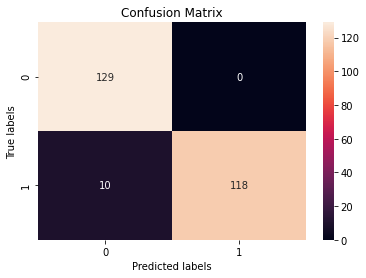

(0.038910505836575876, 0.9610894941634242, 0.9280575539568345, 1.0)

In [ ]:
classifier = NaiveBayesClassifier
all_data = shuffle(all_data).reset_index(drop=True)                             # SHUFFLE DATA
x_train_scaled, x_test_scaled, y_train, y_test = doAllThings(                   # ENCODE LABELS
                                    all_data['Labels'],                         # TRAIN AND TEST SPLIT
                                    all_data.drop(['Labels'],1),                # DATA NORMALIZATION        
                                    encoded, test_size=0.2, random_state=100)
preds = classifier.fit(x_train_scaled,y_train).predict(x_test_scaled)           # FIT MODEL
print_and_plot_performance(y_test, preds)                                       #PERFORMANCE

# K FOLD CROSSVALIDATION WITH SHUFFLED DATA

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FIT DONE IN : 1.608457326889038sec
Model Performance
Average Error:  3.891 %
Accuracy Mean :  96.109 %
True Healthy Rate :  92.647 %
True Tumoral Rate :  100.0 %


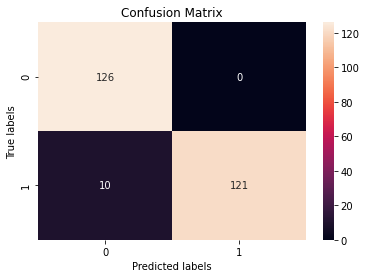

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FIT DONE IN : 1.2801978588104248sec
Model Performance
Average Error:  1.946 %
Accuracy Mean :  98.054 %
True Healthy Rate :  95.935 %
True Tumoral Rate :  100.0 %


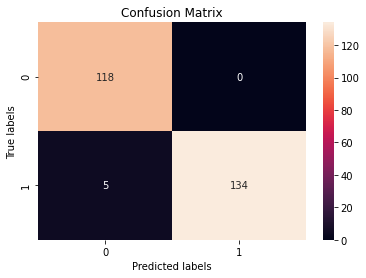

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FIT DONE IN : 1.5832092761993408sec
Model Performance
Average Error:  3.891 %
Accuracy Mean :  96.109 %
True Healthy Rate :  93.243 %
True Tumoral Rate :  100.0 %


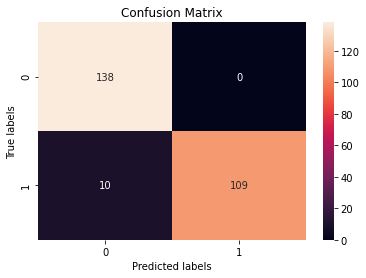

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FIT DONE IN : 1.2972297668457031sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.366 %
True Tumoral Rate :  100.0 %


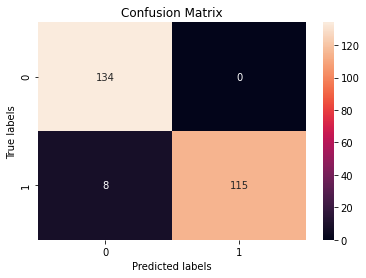

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FIT DONE IN : 1.6038258075714111sec
Model Performance
Average Error:  2.724 %
Accuracy Mean :  97.276 %
True Healthy Rate :  94.891 %
True Tumoral Rate :  100.0 %


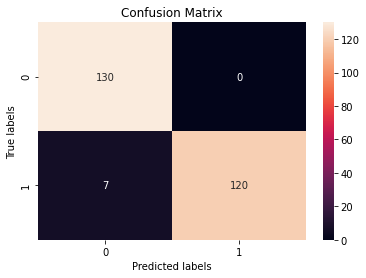

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Average performaces 
Training elapsed time :  1.475 sec
Accuracy :  96.887 %
Error :  3.113 %
True Healthy Rate :  94.216 %
True Tumoral Rate :  100.0 %


In [ ]:
n_shuffle = 5
accuracy_model = []
error_model = []
true_healthy_rate_model = []
true_tumoral_rate_model = []
elapsed_time_model = []
for i in range(0,n_shuffle):                                                    # ALL FEATURES (60483)
  all_data = shuffle(all_data).reset_index(drop=True)                           # SHUFFLE DATA
  x_train_scaled, x_test_scaled, y_train, y_test = doAllThings(                 # ENCODE LABELS
                                    all_data['Labels'],                         # TRAIN AND TEST SPLIT
                                    all_data.drop(['Labels'],1),                # DATA NORMALIZATION        
                                    encoded, test_size=0.2, random_state=100)
  start_time = time.time()                                                      # KEEP TRACK OF TRAINING ELAPSED TIME
  preds = classifier.fit(x_train_scaled,y_train).predict(x_test_scaled)         # FIT MODEL
  elapsed_time = time.time() - start_time
  print('FIT DONE IN : '+str(elapsed_time)+'sec')
  error, acc, true_healthy_rate, true_tumoral_rate = print_and_plot_performance( 
                                    y_test, preds)                              #PERFORMANCE
  elapsed_time_model.append(elapsed_time)
  accuracy_model.append(acc*100)
  error_model.append(error*100)
  true_healthy_rate_model.append(true_healthy_rate*100)
  true_tumoral_rate_model.append(true_tumoral_rate*100)
print('Model : ', classifier)                                                   # PRINT MODEL PERFORMACE
print('Average performaces ')
print('Training elapsed time : ', round(np.array(elapsed_time_model).mean(),3), 'sec')
print('Accuracy : ', round(np.array(accuracy_model).mean(),3), '%')
print('Error : ', round(np.array(error_model).mean(),3),'%')
print('True Healthy Rate : ', round(np.array(true_healthy_rate_model).mean(),3),'%')
print('True Tumoral Rate : ', round(np.array(true_tumoral_rate_model).mean(),3),'%')

# PCA ANALYSIS

Principal Component Analysis ...
Calculating 90% of variance ...
139 features explain around 90% of the variance. From 60483 features to 139, not too bad.


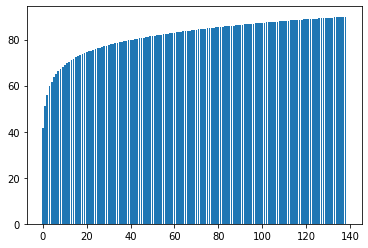

In [ ]:
all_data = shuffle(all_data).reset_index(drop=True)                             # SHUFFLE DATA
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(all_data['Labels'])                       # ENCODE THE LABELS COLUMN
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(['Labels'],1),# TRAIN AND TEST SPLIT
                                                    encoded,
                                                    test_size=0.2,
                                                    random_state=100)
y_train = pd.DataFrame(y_train)                                                 # LABELS FROM NUMPY TO DATAFRAME
y_test = pd.DataFrame(y_test)                                                   # LABELS FROM NUMPY TO DATAFRAME
X_train = X_train.reset_index(drop=True)                                        # RESET INDEX
y_train = y_train.reset_index(drop=True)                                        # RESET INDEX
X_test = X_test.reset_index(drop=True)                                          # RESET INDEX
y_test = y_test.reset_index(drop=True)                                          # RESET INDEX
x_train = X_train.values                                                        # SELECT TRAIN FEATURES SAMPLES
x_test = X_test.values                                                          # SELECT TEST FEATURES SAMPLES
min_max_scaler = MinMaxScaler()                                                 # SELECT STANDARDIZATION FUNCTION
x_train_scaled = min_max_scaler.fit_transform(x_train)                          # SCALE TRAIN DATA
x_test_scaled = min_max_scaler.transform(x_test)                                # SCALE TEST DATA
pca = PCA()                                                                     # PCA FITTING 
print('Principal Component Analysis ...')                   
pca.fit_transform(x_train_scaled)                                                      # x_train_scaled -> IMPROVE ACCURACY PERFORMANCE                      
total = sum(pca.explained_variance_)                  
k = 0                                                                           # CALCULATE THE NUMBER OF PCA COMPONENT THAT HAVE THE 90% OF THE TOTAL VARIANCE
current_variance = 0
print('Calculating 90% of variance ...')
while current_variance/total < 0.90:                                            # WHILE THE AMOUNT OF VARIANCE IS LESS THEN 90%
    current_variance += pca.explained_variance_[k]                              # VARIANCE FOR THAT SPECIFIC PRINCIPAL COMPONENT
    k = k + 1
print(k,                                                                        # PRINT N PCA COMPONENT (99% OF OVERALL VARIANCE)
      " features explain around 90% of the variance. From 60483 features to ",
      k, ", not too bad.", sep='')
pca = PCA(n_components=k)                                                       # SET THE NUMBER OF PCA COMPONENT TO THE 90% OF THE TOTAL VARIANCE
X_train_pca = pca.fit_transform(x_train_scaled)                                 # FIT_TRANSFORM FOR TRAIN
X_test_pca = pca.transform(x_test_scaled)                                       # TRANSFORM FOR TEST
var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

Variance equal to  56.055 % of the overall variance


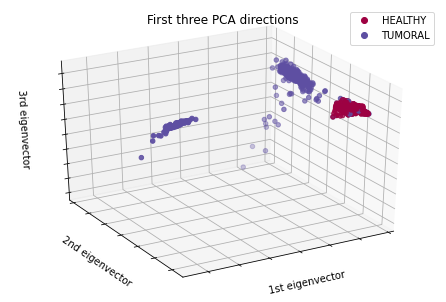

In [ ]:
pca3 = PCA(n_components=3)                                                      # SET 3 PCA COMPONENTS
X_train_pca3 = pca3.fit_transform(x_train_scaled)
k=0                                                                             # CALCULATE THE % OF VARIANCE OVER THE 3 PCA COMPONENTS
variance_3_PCA = 0
while k<3:
  variance_3_PCA += pca.explained_variance_[k]
  k+=1
variance3PCA = variance_3_PCA/total                                                           
print('Variance equal to ',                                                     # PRINT VARIANCE %
      round(variance3PCA*100,3), 
      '% of the overall variance')                                              
plt.clf()                                                                       # PLOT SAMPLES OVER THESE 3 EIGENVECTORS
fig = plt.figure(1, figsize=(16,12))
ax = Axes3D(fig, elev=-150, azim=120)
scatter = ax.scatter(X_train_pca3[:, 0],
                     X_train_pca3[:, 1],
                     X_train_pca3[:, 2], c=y_train, cmap="Spectral" )
ax.set_title("First three PCA directions")                                      # PLOT FEATURES
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
ax.legend(handles=scatter.legend_elements()[0], labels=labels)

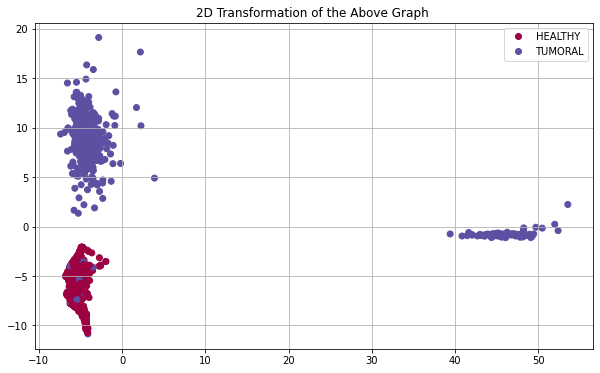

In [ ]:
fig2 = plt.figure(1, figsize = (10, 6))                                         # PLOT 2D TRANSFORMATION OF THE ABOVE GRAPH
scat2d= plt.scatter(X_train_pca3[:, 0], 
                    X_train_pca3[:, 1], c = y_train, cmap="Spectral" )
plt.grid()
plt.title("2D Transformation of the Above Graph ")
plt.legend(handles=scat2d.legend_elements()[0], labels=labels)

# KFOLD CROSSVALIDATION WITH SHUFFLED DATA ON DIFFERENT MODELS


FIT DONE IN : 0.0020203590393066406sec
Model Performance
Average Error:  5.058 %
Accuracy Mean :  94.942 %
True Healthy Rate :  90.076 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


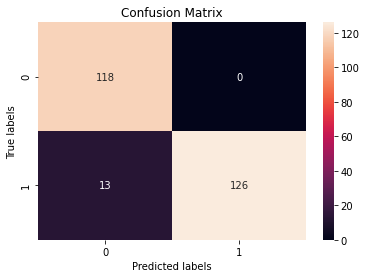


FIT DONE IN : 0.0019562244415283203sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.161 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


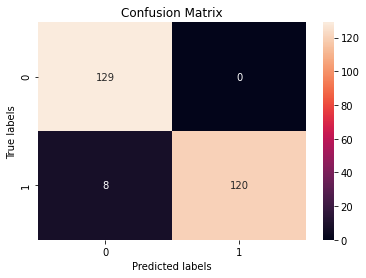


FIT DONE IN : 0.0020995140075683594sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.203 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


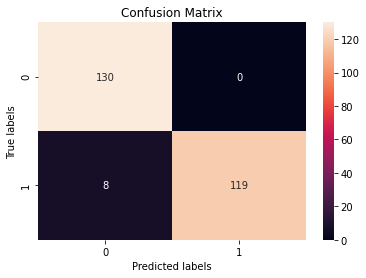


FIT DONE IN : 0.0019986629486083984sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  93.182 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


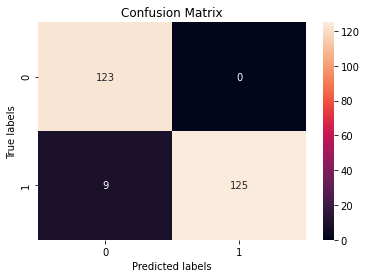


FIT DONE IN : 0.001966238021850586sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.03 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


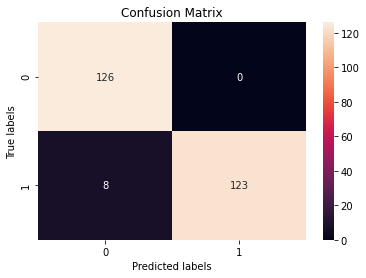

Model :  NearestCentroid(metric='euclidean', shrink_threshold=None)
Average performaces 
Training elapsed time :  0.0020082 sec
Accuracy :  96.42 %
Error :  3.58 %
True Healthy Rate :  93.13 %
True Tumoral Rate :  100.0 %


FIT DONE IN : 0.013870477676391602sec
Model Performance
Average Error:  4.669 %
Accuracy Mean :  95.331 %
True Healthy Rate :  90.698 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


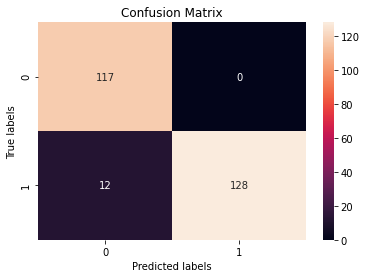


FIT DONE IN : 0.01356196403503418sec
Model Performance
Average Error:  4.28 %
Accuracy Mean :  95.72 %
True Healthy Rate :  92.667 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


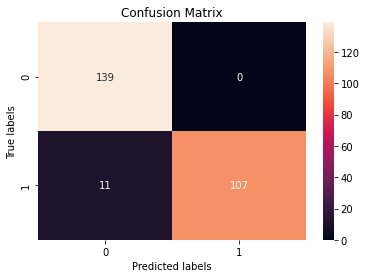


FIT DONE IN : 0.012938499450683594sec
Model Performance
Average Error:  3.891 %
Accuracy Mean :  96.109 %
True Healthy Rate :  93.007 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


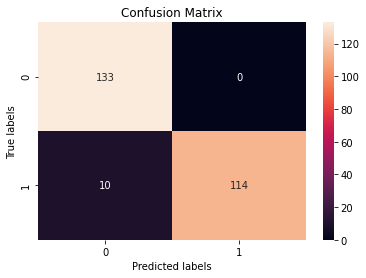

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



FIT DONE IN : 0.01338338851928711sec
Model Performance
Average Error:  4.28 %
Accuracy Mean :  95.72 %
True Healthy Rate :  92.086 %
True Tumoral Rate :  100.0 %


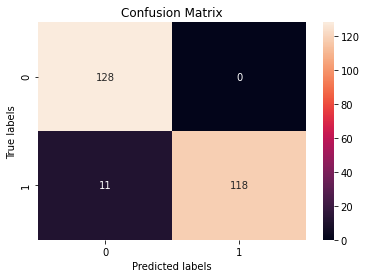


FIT DONE IN : 0.013152837753295898sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  92.437 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


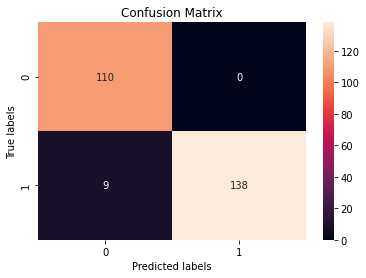

Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Average performaces 
Training elapsed time :  0.013381433 sec
Accuracy :  95.875 %
Error :  4.125 %
True Healthy Rate :  92.179 %
True Tumoral Rate :  100.0 %


FIT DONE IN : 0.0023419857025146484sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.326 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


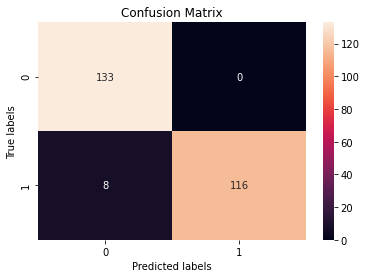


FIT DONE IN : 0.002126455307006836sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  94.574 %
True Tumoral Rate :  98.438 %


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


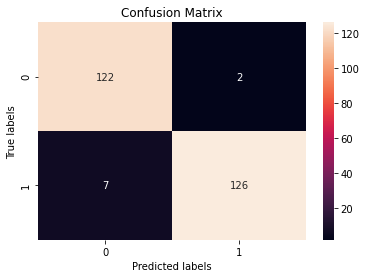


FIT DONE IN : 0.002153158187866211sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.815 %
True Tumoral Rate :  99.18 %


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


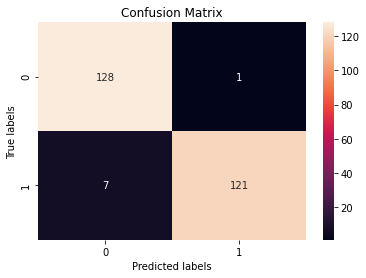


FIT DONE IN : 0.002074718475341797sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  96.154 %
True Tumoral Rate :  97.638 %


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


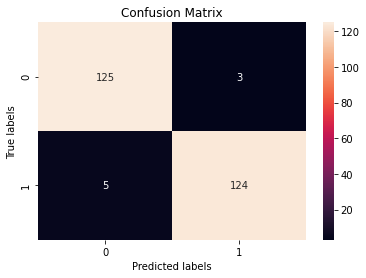


FIT DONE IN : 0.0019943714141845703sec
Model Performance
Average Error:  3.891 %
Accuracy Mean :  96.109 %
True Healthy Rate :  93.6 %
True Tumoral Rate :  98.485 %


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


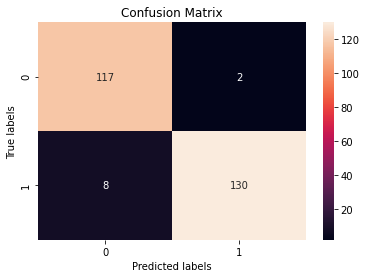

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Average performaces 
Training elapsed time :  0.002138138 sec
Accuracy :  96.654 %
Error :  3.346 %
True Healthy Rate :  94.694 %
True Tumoral Rate :  98.748 %


FIT DONE IN : 0.009876489639282227sec
Model Performance
Average Error:  4.28 %
Accuracy Mean :  95.72 %
True Healthy Rate :  92.086 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


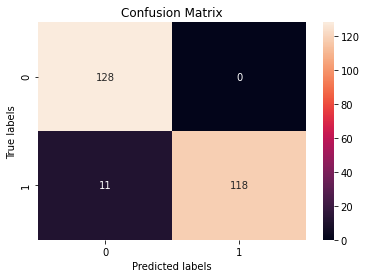


FIT DONE IN : 0.00932765007019043sec
Model Performance
Average Error:  4.28 %
Accuracy Mean :  95.72 %
True Healthy Rate :  92.361 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


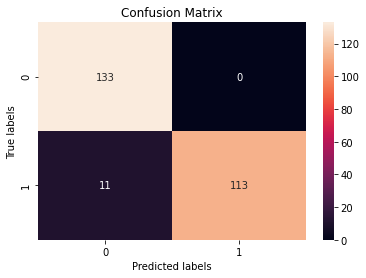


FIT DONE IN : 0.010393857955932617sec
Model Performance
Average Error:  2.335 %
Accuracy Mean :  97.665 %
True Healthy Rate :  95.455 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


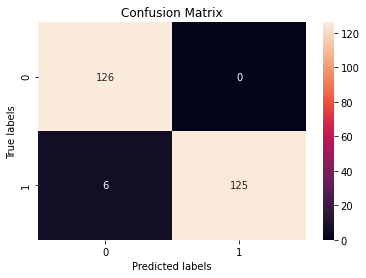


FIT DONE IN : 0.01008462905883789sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  93.75 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


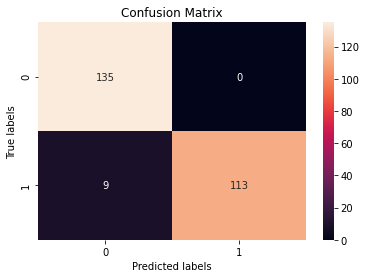


FIT DONE IN : 0.00977468490600586sec
Model Performance
Average Error:  3.113 %
Accuracy Mean :  96.887 %
True Healthy Rate :  94.161 %
True Tumoral Rate :  100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


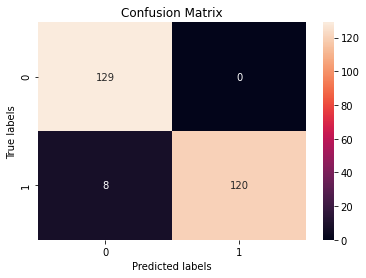

Model :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Average performaces 
Training elapsed time :  0.009891462 sec
Accuracy :  96.498 %
Error :  3.502 %
True Healthy Rate :  93.563 %
True Tumoral Rate :  100.0 %


FIT DONE IN : 0.005131721496582031sec
Model Performance
Average Error:  5.837 %
Accuracy Mean :  94.163 %
True Healthy Rate :  91.87 %
True Tumoral Rate :  96.269 %


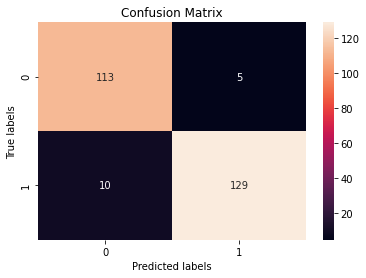


FIT DONE IN : 0.0051686763763427734sec
Model Performance
Average Error:  7.393 %
Accuracy Mean :  92.607 %
True Healthy Rate :  95.745 %
True Tumoral Rate :  88.793 %


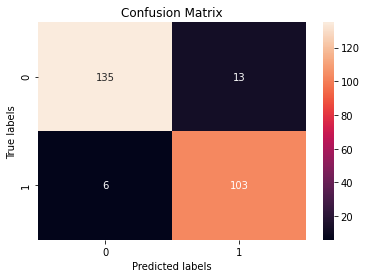


FIT DONE IN : 0.005242586135864258sec
Model Performance
Average Error:  6.226 %
Accuracy Mean :  93.774 %
True Healthy Rate :  93.651 %
True Tumoral Rate :  93.893 %


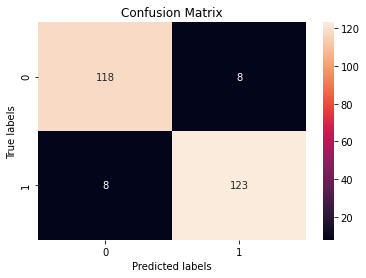


FIT DONE IN : 0.004480838775634766sec
Model Performance
Average Error:  8.949 %
Accuracy Mean :  91.051 %
True Healthy Rate :  92.857 %
True Tumoral Rate :  89.313 %


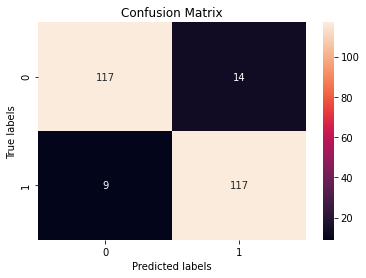


FIT DONE IN : 0.005728244781494141sec
Model Performance
Average Error:  4.669 %
Accuracy Mean :  95.331 %
True Healthy Rate :  96.667 %
True Tumoral Rate :  94.161 %


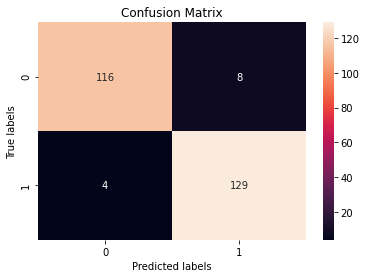

Model :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Average performaces 
Training elapsed time :  0.005150414 sec
Accuracy :  93.385 %
Error :  6.615 %
True Healthy Rate :  94.158 %
True Tumoral Rate :  92.486 %



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



FIT DONE IN : 0.20841526985168457sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  96.026 %
True Tumoral Rate :  97.17 %


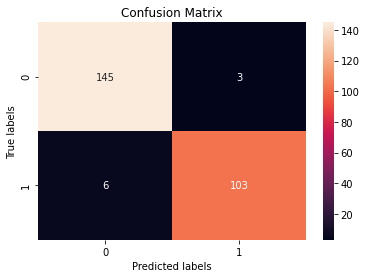

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



FIT DONE IN : 0.19843745231628418sec
Model Performance
Average Error:  6.615 %
Accuracy Mean :  93.385 %
True Healthy Rate :  92.701 %
True Tumoral Rate :  94.167 %


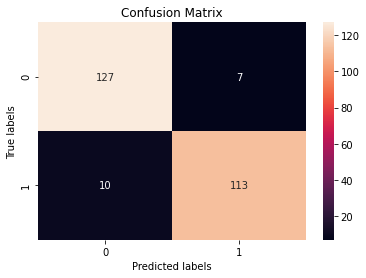

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



FIT DONE IN : 0.2002720832824707sec
Model Performance
Average Error:  6.226 %
Accuracy Mean :  93.774 %
True Healthy Rate :  90.4 %
True Tumoral Rate :  96.97 %


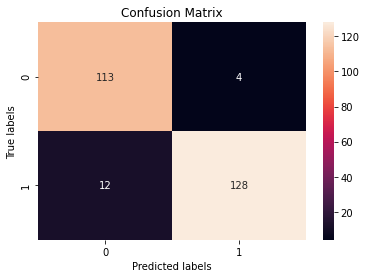

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



FIT DONE IN : 0.1996903419494629sec
Model Performance
Average Error:  6.615 %
Accuracy Mean :  93.385 %
True Healthy Rate :  94.444 %
True Tumoral Rate :  92.366 %


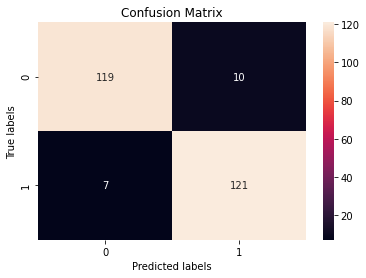

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



FIT DONE IN : 0.20099854469299316sec
Model Performance
Average Error:  7.393 %
Accuracy Mean :  92.607 %
True Healthy Rate :  91.339 %
True Tumoral Rate :  93.846 %


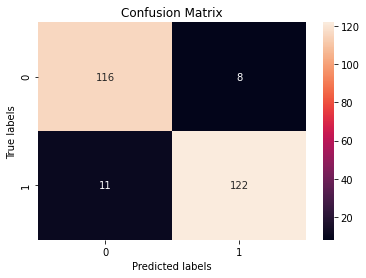

Model :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Average performaces 
Training elapsed time :  0.201562738 sec
Accuracy :  93.93 %
Error :  6.07 %
True Healthy Rate :  92.982 %
True Tumoral Rate :  94.904 %



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



FIT DONE IN : 0.32560157775878906sec
Model Performance
Average Error:  5.447 %
Accuracy Mean :  94.553 %
True Healthy Rate :  90.728 %
True Tumoral Rate :  100.0 %


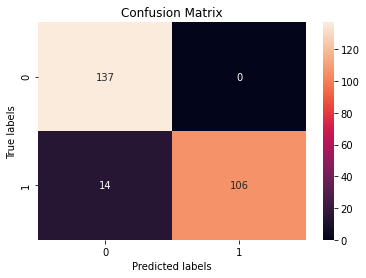

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



FIT DONE IN : 0.281170129776001sec
Model Performance
Average Error:  1.946 %
Accuracy Mean :  98.054 %
True Healthy Rate :  96.269 %
True Tumoral Rate :  100.0 %


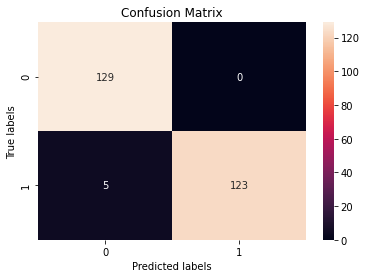

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



FIT DONE IN : 0.2534518241882324sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  93.878 %
True Tumoral Rate :  100.0 %


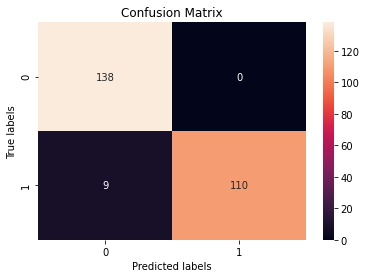

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



FIT DONE IN : 0.21095538139343262sec
Model Performance
Average Error:  3.502 %
Accuracy Mean :  96.498 %
True Healthy Rate :  93.571 %
True Tumoral Rate :  100.0 %


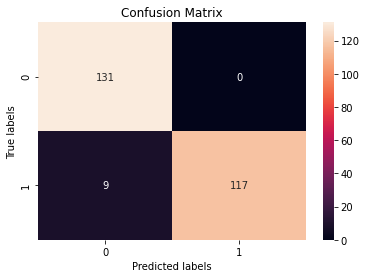

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



FIT DONE IN : 0.1856980323791504sec
Model Performance
Average Error:  4.669 %
Accuracy Mean :  95.331 %
True Healthy Rate :  91.111 %
True Tumoral Rate :  100.0 %


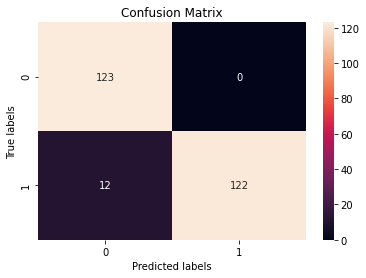

Model :  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Average performaces 
Training elapsed time :  0.251375389 sec
Accuracy :  96.187 %
Error :  3.813 %
True Healthy Rate :  93.111 %
True Tumoral Rate :  100.0 %



In [ ]:
models_name = [                                                                 # NAME OF DIFFERENT CLASSIFIER
          'NeareastMeanClassifier',
          'K_NeighborsClassifier' ,
          'NaiveBayesClassifier' ,
          'SVMClassifier' ,
          'Decision_Tree_Classifier' ,
          'Random_Forest_Classifier' ,
          'NNClassifier'
]
models = [                                                                      # INSTANCE OF DIFFERENT CLASSIFIER
          NeareastMeanClassifier,
          K_NeighborsClassifier ,
          NaiveBayesClassifier ,
          SVMClassifier ,
          Decision_Tree_Classifier ,
          Random_Forest_Classifier ,
          NNClassifier
]
n_pca_Components = 3                                                            # N PCA COMPONENTS
PerformanceDataframe = pd.DataFrame()                                           # PERFORMANCE DATAFRAME
for classifier,name in zip(models,models_name):                                 # DIFFERENT CLASSIFIER
  n_shuffle = 50                                                                # N SHUFFLE
  accuracy_model , error_model ,true_healthy_rate_model = ([] for i in range(3))# VARIABLES TO STORE PERFORMANCE
  true_tumoral_rate_model ,elapsed_time_model , model_performance = ([] for i in range(3))
  for i in range(0,n_shuffle):
    all_data = shuffle(all_data).reset_index(drop=True)                         # SHUFFLE DATA
    x_train_PCA, x_test_PCA, y_train, y_test = doAllThings_PCA(                 # PCA COMPONENTS
                                    n_pca_Components,                           # ENCODE LABELS
                                    all_data['Labels'],                         # TRAIN AND TEST SPLIT
                                    all_data.drop(['Labels'],1),                # DATA NORMALIZATION        
                                    encoded, test_size=0.2, random_state=100)
    start_time = time.time()                                                    # KEEP TRACK OF TRAINING ELAPSED TIME
    preds = classifier.fit(x_train_PCA,y_train).predict(x_test_PCA)             # FIT MODEL
    elapsed_time = time.time() - start_time                                     # SAVE ELAPSED TIME
    print('\nFIT DONE IN : '+str(elapsed_time)+'sec')                           # PRINT ELAPSED TIME
    error, acc, true_healthy_rate, true_tumoral_rate = print_and_plot_performance( 
                                    y_test, preds)                              #PRINT AND PLOT PERFORMANCE
    elapsed_time_model.append(elapsed_time)   
    accuracy_model.append(acc*100)
    error_model.append(error*100)
    true_healthy_rate_model.append(true_healthy_rate*100)
    true_tumoral_rate_model.append(true_tumoral_rate*100)
  print('Model : ', classifier)                                                 # PRINT AVERAGE PERFORMANCE
  print('Average performaces ')
  print('Training elapsed time : ', round(np.array(elapsed_time_model).mean(),9), 'sec')
  print('Accuracy : ', round(np.array(accuracy_model).mean(),3), '%') 
  print('Error : ', round(np.array(error_model).mean(),3),'%')  
  print('True Healthy Rate : ', round(np.array(true_healthy_rate_model).mean(),3),'%')
  print('True Tumoral Rate : ', round(np.array(true_tumoral_rate_model).mean(),3),'%\n')
  model_performance.append(round(np.array(elapsed_time_model).mean(),9))        # APPEND THE MODEL PERFORMANCE
  model_performance.append(round(np.array(accuracy_model).mean(),3))
  model_performance.append(round(np.array(error_model).mean(),3))
  model_performance.append(round(np.array(true_healthy_rate_model).mean(),3))
  model_performance.append(round(np.array(true_tumoral_rate_model).mean(),3))
  PerformanceDataframe[name] = model_performance                                # PERFORMANCE DATAFRAME
  PerformanceDataframe.rename(index={0:'Training elapsed time',
                                   1:'Accuracy',
                                   2:'Error',
                                   3:'True Healthy Rate',
                                   4:'True Tumoral Rate'},
                                   inplace=True)

In [ ]:
print(PerformanceDataframe)
PerformanceDataframe.to_csv('GenomicPerformaceDataframe.csv')

                       NeareastMeanClassifier  ...  NNClassifier
Training elapsed time                0.002008  ...      0.251375
Accuracy                            96.420000  ...     96.187000
Error                                3.580000  ...      3.813000
True Healthy Rate                   93.130000  ...     93.111000
True Tumoral Rate                  100.000000  ...    100.000000

[5 rows x 7 columns]
